<a href="https://colab.research.google.com/github/shirshir05/ATP-Project-PartC/blob/master/Project_housing_shir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project:**

# **Submitted by:** Itai Dagan and Shie Cohen

# **TODO before runing:**

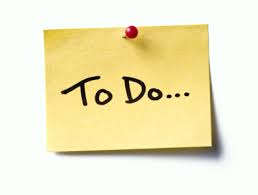


1.   From [Redfin](https://www.redfin.com/news/data-center/) download neighborhood_market_tracker.tsv000.gz and upload "neighborhood_market_tracker.tsv000.gz" to your drive in path 'MyDrive'
https://redfin-public-data.s3.us-west-2.amazonaws.com/redfin_market_tracker/neighborhood_market_tracker.tsv000.gz
2.   Donaload from  [here](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data) data on crime and upload "crimes_-_2001_to_Present.csv" to your drive in path 'MyDrive'


# **Install packge**

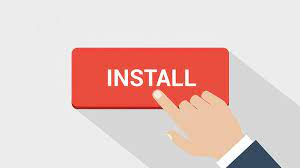

In [ ]:
!pip install turicreate
!pip install wikipedia
!pip install networkx

     |████████████████████████████████| 92.0 MB 15 kB/s 
     |████████████████████████████████| 3.6 MB 32.0 MB/s 
     |████████████████████████████████| 322 kB 48.6 MB/s 
     |████████████████████████████████| 3.5 MB 40.1 MB/s 
     |████████████████████████████████| 86.4 MB 68 kB/s 
     |████████████████████████████████| 18.3 MB 48.3 MB/s 
     |████████████████████████████████| 449 kB 46.8 MB/s 
     |████████████████████████████████| 2.9 MB 32.1 MB/s 
     |████████████████████████████████| 20.1 MB 1.5 MB/s 
     |████████████████████████████████| 3.8 MB 47.8 MB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=7bf59387fe13f121e54299cb0d174030f4c73e6d5e92556c4dee3a512a553864
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320859 sha256=e9a0503d48

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=51687b2f23d17b0a6b9407a1a8a60ab8197fb9cbbe00fdd7f65964b245d6353d
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


# **Import**

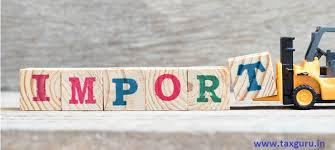

In [ ]:
import os
import csv
import turicreate as tc
from turicreate import SFrame
import tarfile
import pandas as pd
import gzip
import shutil
import pandas as pd
import geopy
import pandas as pd
import wikipedia
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 
from bs4 import BeautifulSoup
import requests
from google.colab import drive
import turicreate.aggregate as agg
import matplotlib.pyplot as plt

# Configuration

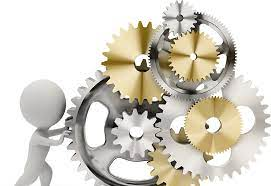

**Define google dribe**

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


**Create folder in drive to save results**

In [ ]:
if not os.path.exists(os.path.join('content', 'drive', 'Project Housing')):
  os.makedirs(os.path.join('content', 'drive', 'Project Housing'))

FOLDER_SAVE_RESULTS = os.path.join('content', 'drive', 'Project Housing')
FOLDER_SAVE_RESULTS

'content/drive/Project Housing'

"""
This is an example of Google style.

Args:
    param1: This is the first param.
    param2: This is a second param.

Returns:
    This is a description of what is returned.

Raises:
    KeyErr

"""

# **Useful function (code reuse)**

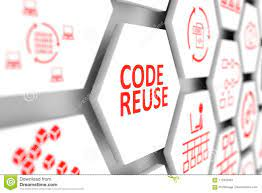

In [ ]:
def remove_columns_one_value(df):
  """ 
  The function removes all columns that contain a single value
  Args: 
      df (sfarme): 

  Returns: new sframe
  """
  def check_len(col_name):
    set_col_name = set(df[col_name])
    if len(set_col_name) == 1:
      print(f"{col_name} remove because  contain only value {set_col_name}")
      return df.remove_column(col_name)
    return df
  for col in df.column_names():
    df = check_len(col)
  return df

def split_column_by_hyphen(df, column_name):
  """ 
  The function split column in foramt year-motha-day. 
  The column name remove from the sframe.
  Args: 
      df (sfarme): 
      column_name (str): 
  Returns: new sframe
  """
  df[column_name + "_split"] = df[column_name].apply(lambda x: x.split('-'))
  df[column_name + '_year'] = df[column_name + "_split"].apply(lambda x: int(x[0]))
  df[column_name + '_month'] = df[column_name + "_split"].apply(lambda x:  int(x[1]))
  df[column_name + '_day'] = df[column_name + "_split"].apply(lambda x:  int(x[2]))
  df = df.remove_column(column_name)
  df = df.remove_column(column_name + "_split")
  return df


def leave_columns(df, columns_name_leave):
  """ 
  The function gets a sframe and a list of columns to leave. 
  The rest of the columns the function removes from the sfarme. 
  The function returns a new sframe without the removed columns.
  Args: 
      df (sfarme): 
      columns_name_leave (str): 
  Returns: new sframe
  """
  for col in df.column_names():
    if col not in columns_name_leave:
      df = df.remove_column(col)
  return df

def conut_missing_value(df):
  """ 
  The function receives a sframe and for each column returns the number of 
  missing values. The function returns a dictionary that the key is the name 
  of the column and the value is the number of missing values.
  Args: 
      df (sfarme): 
  Returns: dict {'name column' : NUMBER_MISSING_VALUE}
  """
  dict_ = {}
  for col in df.column_names():
    dict_[col] = df[col].countna()
  return dict_

def count_by_col(col_name):
  g = df_market.groupby(col_name, {'Count': agg.COUNT()})
  print(f"Min {col_name}: %s" % g[col_name].min())
  print(f"Max {col_name}: %s"% g[col_name].max())
  print(g.sort("Count", ascending=False))
  plt.bar(g[col_name], list(g['Count']))
  plt.title(f"Count according {col_name}")
  plt.xlabel(col_name)
  plt.ylabel("Count")
  plt.show()
  plt.clf()


# **Collecting data from [wikipedia](https://en.wikipedia.org/wiki/Chicago) using APIs**

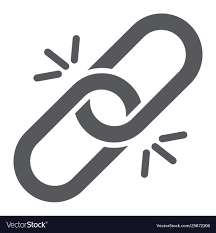




In [ ]:
w = wikipedia.page("Chicago")
print(f"Number of link in Chicago page {len(w.links)}")

Let's build a graph in which each vertex is a category and each link is between categories that reference each other.

In [ ]:
verticies = set(w.links[:100])
links = [("Chicago", l) for l in verticies]

for v in verticies:
    try:
        w = wikipedia.page(v)
        for v2 in w.links:
            if v2 in verticies:
                links.append((v,v2))    
    except Exception as e:
        pass
links

Let's draw the graph

In [ ]:
g = nx.DiGraph()
g.add_edges_from(set(links))
nx.info(g)
plt.figure(3,figsize=(14,14))
nx.draw_kamada_kawai(g, with_labels=True)

# **Extract data from website with BeautifulSoup**

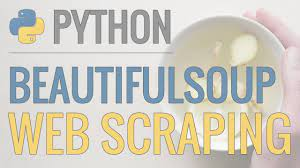

In [ ]:
u = "https://www.dreamtown.com/maps/chicago-zipcode-map"
data = requests.get(u).content.decode('utf-8')
name_neighborhoods = soup.findAll('a', attrs={'class':'allow-link-style'})
#Getting the titles
neighborhoods = [name_neighborhoods[index].contents[0] for index in range(0, len(name_neighborhoods),2)]
print(neighborhoods)
print(f"Number of neighborhoods is {len(neighborhoods)}")
zip_code_and_name_neighborhoods_soup = soup.findAll('td')
zip_code= [ i.text for i in zip_code_and_name_neighborhoods_soup if i is not None and list(i.children)[0] not in name_neighborhoods and '(' not in i.text]
print(zip_code)
print(f"Number of zip code is {len(zip_code)}")
zip_code_and_name_neighborhoods = list(zip(neighborhoods, zip_code))
with open(FOLDER_SAVE_RESULTS + '/neighborhoods_zip_code_from_website.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['neighborhoods','zip code'])
    for row in zip_code_and_name_neighborhoods:
        csv_out.writerow(row)
with open(FOLDER_SAVE_RESULTS + '/neighborhoods_zip_code_from_website.csv','r') as inf:
    print(inf.read())

# **Housing Market Data From [Redfin](https://www.redfin.com/news/data-center/)**

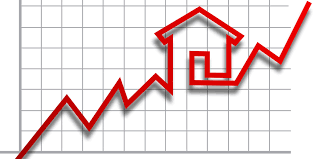

## **Step 1** - Read data from file

In [ ]:
if not os.path.exists('/content/drive/MyDrive/neighborhood_market_tracker.tsv000'):
  with gzip.open('/content/drive/MyDrive/neighborhood_market_tracker.tsv000.gz', 'rb') as f_in:
      with open('/content/drive/MyDrive/neighborhood_market_tracker.tsv000', 'wb') as f_out:
          shutil.copyfileobj(f_in, f_out)
df = tc.SFrame.read_csv("/content/drive/MyDrive/neighborhood_market_tracker.tsv000", sep='\t')

Finished parsing file /content/drive/MyDrive/neighborhood_market_tracker.tsv000

Parsing completed. Parsed 100 lines in 1.67397 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int,str,int,int,str,str,str,str,str,str,int,int,float,float,int,float,float,float,float,float,float,float,float,int,float,float,int,float,float,int,float,float,int,float,float,str,str,str,float,float,float,float,float,float,float,float,float,str,str,str,float,float,float,str,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 94680 lines. Lines per second: 38999.6

Read 474144 lines. Lines per second: 60042.2

Read 854676 lines. Lines per second: 62150.4

Read 1236110 lines. Lines per second: 61917.4

Read 1618378 lines. Lines per second: 61412.9

Read 2001095 lines. Lines per second: 60932.2

Read 2384076 lines. Lines per second: 60811.4

Read 2671514 lines. Lines per second: 60220.5

Read 3054990 lines. Lines per second: 59971.2

Read 3439005 lines. Lines per second: 59932.5

Read 3727130 lines. Lines per second: 59774.9

Read 4111616 lines. Lines per second: 59669.8

Read 4400155 lines. Lines per second: 59595.1

Read 4784699 lines. Lines per second: 59488.1

Read 5169505 lines. Lines per second: 59400.9

Read 5458189 lines. Lines per second: 59088.1

Read 5843148 lines. Lines per second: 57094

Read 6132081 lines. Lines per second: 57103.2

Read 6421008 lines. Lines per second: 57105.5

Read 6710191 lines. Lines per second: 57053.6

Read 6999289 lines. Lines per second: 57042.2

Read 7288217 lines. Lines per second: 57019.7

Read 7673857 lines. Lines per second: 57026.3

Read 7962929 lines. Lines per second: 57046.7

Read 8252024 lines. Lines per second: 57040.1

Read 8541298 lines. Lines per second: 57004

Finished parsing file /content/drive/MyDrive/neighborhood_market_tracker.tsv000

Parsing completed. Parsed 8829270 lines in 153.859 secs.

## **Step 2** - Selection  only Chicago

In [ ]:
df_Chicago = df[df['city'] == 'Chicago']
df_Chicago.show

<bound method SFrame.show of Columns:
	period_begin	str
	period_end	str
	period_duration	int
	region_type	str
	region_type_id	int
	table_id	int
	is_seasonally_adjusted	str
	region	str
	city	str
	state	str
	state_code	str
	property_type	str
	property_type_id	int
	median_sale_price	int
	median_sale_price_mom	float
	median_sale_price_yoy	float
	median_list_price	int
	median_list_price_mom	float
	median_list_price_yoy	float
	median_ppsf	float
	median_ppsf_mom	float
	median_ppsf_yoy	float
	median_list_ppsf	float
	median_list_ppsf_mom	float
	median_list_ppsf_yoy	float
	homes_sold	int
	homes_sold_mom	float
	homes_sold_yoy	float
	pending_sales	int
	pending_sales_mom	float
	pending_sales_yoy	float
	new_listings	int
	new_listings_mom	float
	new_listings_yoy	float
	inventory	int
	inventory_mom	float
	inventory_yoy	float
	months_of_supply	str
	months_of_supply_mom	str
	months_of_supply_yoy	str
	median_dom	float
	median_dom_mom	float
	median_dom_yoy	float
	avg_sale_to_list	float
	avg_sale_to_list_m

## **Step 3** -  remove columns with one value

In [ ]:
df_Chicago = remove_columns_one_value(df_Chicago)
df_Chicago.show


period_duration remove because  contain only value {90}
region_type remove because  contain only value {'neighborhood'}
region_type_id remove because  contain only value {1}
is_seasonally_adjusted remove because  contain only value {'f'}
city remove because  contain only value {'Chicago'}
state remove because  contain only value {'Illinois'}
state_code remove because  contain only value {'IL'}
months_of_supply remove because  contain only value {''}
months_of_supply_mom remove because  contain only value {''}
months_of_supply_yoy remove because  contain only value {''}
price_drops remove because  contain only value {''}
price_drops_mom remove because  contain only value {''}
price_drops_yoy remove because  contain only value {''}
parent_metro_region remove because  contain only value {'Chicago, IL'}
parent_metro_region_metro_code remove because  contain only value {16984}
last_updated remove because  contain only value {'2021-11-21 14:35:51'}


<bound method SFrame.show of Columns:
	period_begin	str
	period_end	str
	table_id	int
	region	str
	property_type	str
	property_type_id	int
	median_sale_price	int
	median_sale_price_mom	float
	median_sale_price_yoy	float
	median_list_price	int
	median_list_price_mom	float
	median_list_price_yoy	float
	median_ppsf	float
	median_ppsf_mom	float
	median_ppsf_yoy	float
	median_list_ppsf	float
	median_list_ppsf_mom	float
	median_list_ppsf_yoy	float
	homes_sold	int
	homes_sold_mom	float
	homes_sold_yoy	float
	pending_sales	int
	pending_sales_mom	float
	pending_sales_yoy	float
	new_listings	int
	new_listings_mom	float
	new_listings_yoy	float
	inventory	int
	inventory_mom	float
	inventory_yoy	float
	median_dom	float
	median_dom_mom	float
	median_dom_yoy	float
	avg_sale_to_list	float
	avg_sale_to_list_mom	float
	avg_sale_to_list_yoy	float
	sold_above_list	float
	sold_above_list_mom	float
	sold_above_list_yoy	float
	off_market_in_two_weeks	float
	off_market_in_two_weeks_mom	float
	off_market_in_tw

## **Step 4** - Removing unnecessary columns

In [ ]:
df_Chicago.print_rows(num_rows=5, num_columns=41)
columns_name_leave = ['period_begin', 'period_end', 'region', 'property_type', 'median_list_price', 'homes_sold', 'inventory', 'new_listings']
df_Chicago = leave_columns(df_Chicago, columns_name_leave)

+--------------+------------+----------+------------------------------+
| period_begin | period_end | table_id |            region            |
+--------------+------------+----------+------------------------------+
|  2014-03-01  | 2014-05-31 |  29339   |     Chicago, IL - Uptown     |
|  2017-11-01  | 2018-01-31 |  555134  |     Chicago, IL - Loyola     |
|  2019-09-01  | 2019-11-30 |  548063  | Chicago, IL - Edgewater Glen |
|  2012-02-01  | 2012-04-30 |  31056   |   Chicago, IL - West Lawn    |
|  2017-09-01  | 2017-11-30 |  31056   |   Chicago, IL - West Lawn    |
+--------------+------------+----------+------------------------------+
+---------------------------+------------------+-------------------+
|       property_type       | property_type_id | median_sale_price |
+---------------------------+------------------+-------------------+
|      All Residential      |        -1        |       252250      |
| Single Family Residential |        6         |       310000      |
|      

In [ ]:
df_Chicago.show

<bound method SFrame.show of Columns:
	period_begin	str
	period_end	str
	region	str
	property_type	str
	median_list_price	int
	homes_sold	int
	new_listings	int
	inventory	int

Rows: 100198

Data:
+--------------+------------+------------------------------+
| period_begin | period_end |            region            |
+--------------+------------+------------------------------+
|  2014-03-01  | 2014-05-31 |     Chicago, IL - Uptown     |
|  2017-11-01  | 2018-01-31 |     Chicago, IL - Loyola     |
|  2019-09-01  | 2019-11-30 | Chicago, IL - Edgewater Glen |
|  2012-02-01  | 2012-04-30 |   Chicago, IL - West Lawn    |
|  2017-09-01  | 2017-11-30 |   Chicago, IL - West Lawn    |
|  2018-10-01  | 2018-12-31 | Chicago, IL - Palmer Square  |
|  2014-04-01  | 2014-06-30 |    Chicago, IL - Avondale    |
|  2015-11-01  | 2016-01-31 |     Chicago, IL - Austin     |
|  2014-06-01  | 2014-08-31 |    Chicago, IL - New City    |
|  2019-03-01  | 2019-05-31 |   Chicago, IL - Sheffield    |
+----------

## **Step 4** - Handle missing values

First, we will count the number of missing values in each column to determine how to handle the missing data.

In [ ]:
conut_missing_value(df_Chicago)

{'homes_sold': 0,
 'inventory': 8123,
 'median_list_price': 6364,
 'new_listings': 6329,
 'period_begin': 0,
 'period_end': 0,
 'property_type': 0,
 'region': 0}

In [ ]:
df_Chicago = df_Chicago.dropna()

In [ ]:
df_Chicago.show

<bound method SFrame.show of Columns:
	period_begin	str
	period_end	str
	region	str
	property_type	str
	median_list_price	int
	homes_sold	int
	new_listings	int
	inventory	int

Rows: Unknown

Data:
+--------------+------------+------------------------------+
| period_begin | period_end |            region            |
+--------------+------------+------------------------------+
|  2014-03-01  | 2014-05-31 |     Chicago, IL - Uptown     |
|  2017-11-01  | 2018-01-31 |     Chicago, IL - Loyola     |
|  2019-09-01  | 2019-11-30 | Chicago, IL - Edgewater Glen |
|  2012-02-01  | 2012-04-30 |   Chicago, IL - West Lawn    |
|  2018-10-01  | 2018-12-31 | Chicago, IL - Palmer Square  |
|  2014-04-01  | 2014-06-30 |    Chicago, IL - Avondale    |
|  2015-11-01  | 2016-01-31 |     Chicago, IL - Austin     |
|  2014-06-01  | 2014-08-31 |    Chicago, IL - New City    |
|  2019-03-01  | 2019-05-31 |   Chicago, IL - Sheffield    |
|  2016-12-01  | 2017-02-28 |   Chicago, IL - West Lawn    |
+---------

## **Step 5** - Manipulation on columns

### **Data period**

The data of period_begin and period_end write in format 'year-month-dat' e.g: 2014-03-01 

In [ ]:
df_Chicago = split_column_by_hyphen(df_Chicago, 'period_begin')
df_Chicago = split_column_by_hyphen(df_Chicago, 'period_end')

In [ ]:
df_Chicago.show

### **Region** 

The region column contains the name of the state (IL), the city (Chicago) and the neighborhood. e.g 'Chicago, IL – Uptown'  

In [ ]:
df_Chicago['neighborhood'] = df_Chicago['region'].apply(lambda s: s.split("IL -")[1])
df_Chicago = df_Chicago.remove_column('region')
df_Chicago = df_Chicago.remove_column('region')

In [ ]:
df_Chicago.groupby("neighborhood",{'count':tc.aggregate.COUNT()}).export_csv("neighborhood.csv")

## **Step 6** - Display the data

In [ ]:
df_Chicago.show()

# **Crime data from [Chicago data portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data)**

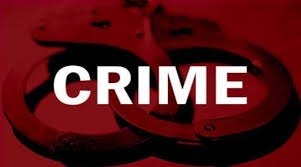

## **Step 1** - Read data from file

In [ ]:
df_crime = tc.SFrame.read_csv('/content/drive/MyDrive/Crimes_-_2001_to_Present.csv')

In [ ]:
df_crime.show

## **Step 2** - remove columns with one value

In [ ]:
df_crime = remove_columns_one_value(df_crime)
df_crime.show

## **Step 3** - Removing unnecessary columns

In [ ]:
df_crime.print_rows(5,24)

+----------+-------------+------------------------+-----------------------+------+
|    ID    | Case Number |          Date          |         Block         | IUCR |
+----------+-------------+------------------------+-----------------------+------+
| 10224738 |   HY411648  | 09/05/2015 01:30:00 PM |    043XX S WOOD ST    | 0486 |
| 10224739 |   HY411615  | 09/04/2015 11:30:00 AM |  008XX N CENTRAL AVE  | 0870 |
| 11646166 |   JC213529  | 09/01/2018 12:01:00 AM | 082XX S INGLESIDE AVE | 0810 |
| 10224740 |   HY411595  | 09/05/2015 12:45:00 PM |   035XX W BARRY AVE   | 2023 |
| 10224741 |   HY411610  | 09/05/2015 01:00:00 PM |  0000X N LARAMIE AVE  | 0560 |
+----------+-------------+------------------------+-----------------------+------+
+--------------+-------------------------+----------------------+--------+----------+
| Primary Type |       Description       | Location Description | Arrest | Domestic |
+--------------+-------------------------+----------------------+--------+-------